In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import os
os.listdir('input')

['2015-07-28_mixed.binetflow.after.desinfection',
 '2015-07-28_mixed.binetflow.after.desinfection_clean',
 '2015-07-28_mixed.binetflow.after.infection',
 '2015-07-28_mixed.binetflow.after.infection_clean',
 '2015-07-28_mixed.binetflow.before.infection',
 '2015-07-28_mixed.binetflow.before.infection_clean',
 'data_after.csv',
 'data_after_direct.csv',
 'data_after_starttime.csv',
 'data_before.csv',
 'data_before_direct.csv',
 'data_before_starttime.csv',
 'data_infected.csv',
 'data_infected_direct.csv',
 'data_infected_starttime.csv']

In [3]:
before = pd.read_csv('input/2015-07-28_mixed.binetflow.before.infection_clean',parse_dates=['StartTime'])
infected = pd.read_csv('input/2015-07-28_mixed.binetflow.after.infection_clean',parse_dates=['StartTime'])
after = pd.read_csv('input/2015-07-28_mixed.binetflow.after.desinfection_clean',parse_dates=['StartTime'])


print(before.shape)
print(infected.shape)
print(after.shape)

(14337, 17)
(29407, 17)
(8629, 17)


In [4]:
before.dtypes

StartTime    datetime64[ns]
Dur                 float64
Proto                object
SrcAddr              object
Sport                object
Dir                  object
DstAddr              object
Dport                object
State                object
sTos                float64
dTos                float64
TotPkts               int64
TotBytes              int64
SrcBytes            float64
srcUdata             object
dstUdata             object
Label               float64
dtype: object

In [5]:
infected.groupby('Proto').count()

,StartTime,Dur,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,srcUdata,dstUdata,Label
Proto,,,,,,,,,,,,,,,,
arp,4,4,4,0,4,4,0,4,0,0,4,4,4,0,0,0
icmp,286,286,286,286,286,286,286,286,286,0,286,286,286,286,0,0
igmp,21,21,21,0,21,21,0,21,21,0,21,21,21,21,0,0
rtcp,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0
tcp,10598,10598,10598,10598,10598,10598,10598,10598,10598,10545,10598,10598,10598,7952,7183,0
udp,18489,18489,18489,18489,18489,18489,18489,18489,18489,18112,18489,18489,18479,18489,18102,0


In [6]:
before.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,14337.000000,14335.000000,13795.0,14337.000000,1.433700e+04,14333.000000,0.0
mean,90.298342,0.000209,0.0,36.924810,2.910504e+04,177.788251,NaN
std,474.897916,0.025057,0.0,878.781607,9.593427e+05,2708.837560,NaN
min,0.000000,0.000000,0.0,1.000000,6.000000e+01,6.000000,NaN
25%,0.089441,0.000000,0.0,2.000000,1.990000e+02,7.000000,NaN
50%,0.105104,0.000000,0.0,2.000000,2.550000e+02,8.000000,NaN
75%,0.590065,0.000000,0.0,5.000000,3.880000e+02,26.000000,NaN
max,3599.997070,3.000000,0.0,48852.000000,5.190998e+07,241454.000000,NaN


In [7]:
before.drop(['sTos', 'dTos'], axis=1, inplace=True)

In [8]:
#cantidad de llamadas de la ip origen
before.groupby('SrcAddr').count()

,StartTime,Dur,Proto,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,srcUdata,dstUdata,Label
SrcAddr,,,,,,,,,,,,,,
0.0.0.0,2,2,2,0,2,2,0,2,2,2,2,0,0,0
10.0.0.45,14294,14294,14294,14290,14294,14294,14290,14294,14294,14294,14290,13406,11858,0
193.77.148.62,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2.4.6.172,1,1,1,1,1,1,1,1,1,1,1,1,0,0
213.139.53.202,1,1,1,1,1,1,1,1,1,1,1,1,1,0
222.128.199.6,1,1,1,1,1,1,1,1,1,1,1,1,1,0
31.171.237.45,1,1,1,1,1,1,1,1,1,1,1,1,0,0
31.43.245.103,1,1,1,1,1,1,1,1,1,1,1,1,0,0
37.146.232.152,4,4,4,4,4,4,4,4,4,4,4,4,0,0


In [9]:
#cantidad de ip destino
before.groupby('DstAddr').count()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,Dport,State,TotPkts,TotBytes,SrcBytes,srcUdata,dstUdata,Label
DstAddr,,,,,,,,,,,,,,
0.0.0.1,4,4,4,4,0,4,0,4,4,4,4,4,0,0
10.0.0.255,36,36,36,36,36,36,36,36,36,36,36,36,0,0
10.0.0.45,43,43,43,43,41,43,40,43,43,43,43,41,2,0
10.121.114.219,1,1,1,1,1,1,1,1,1,1,1,1,0,0
103.23.84.125,1,1,1,1,1,1,1,1,1,1,1,1,1,0
104.156.81.134,2,2,2,2,2,2,2,2,2,2,2,1,1,0
104.16.12.8,1,1,1,1,1,1,1,1,1,1,1,1,1,0
104.16.16.35,1,1,1,1,1,1,1,1,1,1,1,1,1,0
104.16.23.235,2,2,2,2,2,2,2,2,2,2,2,0,0,0


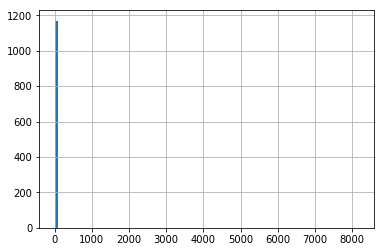

In [10]:
#histogram con cantidad de llamadas a cada destino
before.groupby('DstAddr').count()['Dur'].hist(bins=100)

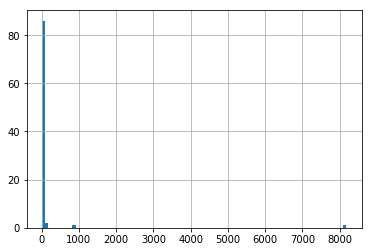

In [15]:
#histogram con cantidad de llamadas a cada destino, de los que llamo mas de 10 veces
c = before.groupby('DstAddr').count()
c[c.Dur > 10]['Dur'].hist(bins=100)

In [16]:
after.groupby('Dir').count()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,srcUdata,dstUdata,Label
Dir,,,,,,,,,,,,,,,,
->,2291,2291,2291,2291,2287,2291,2287,2291,2291,1932,2291,2291,2291,1926,1347,0
?>,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0
<-,10,10,10,10,10,10,10,10,10,10,10,10,0,10,0,0
<->,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,0


In [14]:
directions = {'   ->':'send', '  <-':'receive', '  <->':'both', '  who':'who', '   ?>':'who'}
before['Dir'].replace(directions, inplace=True)
after['Dir'].replace(directions, inplace=True)
infected['Dir'].replace(directions, inplace=True)

In [15]:
before.sort_values(by='StartTime', inplace=True)
after.sort_values(by='StartTime', inplace=True)
infected.sort_values(by='StartTime', inplace=True)

In [16]:
before.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,srcUdata,dstUdata,Label
0,2015-07-25 17:51:36.806330,2.002857,arp,0.0.0.0,NaN,who,10.0.0.45,NaN,INT,3,126,126.0,NaN,NaN,NaN
1,2015-07-25 17:51:36.806347,2.002854,arp,0.0.0.0,NaN,who,10.0.0.45,NaN,INT,3,126,126.0,NaN,NaN,NaN
2,2015-07-25 17:51:38.669899,0.000032,igmp,10.0.0.45,NaN,send,0.0.0.1,NaN,INT,2,108,10.0,"s[32]=""...............""...............",NaN,NaN
3,2015-07-25 17:51:38.809421,0.000023,igmp,10.0.0.45,NaN,send,0.0.0.1,NaN,INT,2,108,10.0,"s[32]=""...............""...............",NaN,NaN
4,2015-07-25 17:53:46.187962,0.098119,udp,10.0.0.45,61048,send,224.0.0.252,5355,INT,4,256,25.0,s[88]=J............wpad.....J............wpad....,NaN,NaN


In [17]:
time1 = before.loc[0,'StartTime']
time2 = before.loc[100,'StartTime']
print(time1)
print(time2)

(time2-time1).total_seconds() / 60

2015-07-25 17:51:36.806330
2015-07-25 18:04:11.617603


12.580187883333334

In [18]:
import datetime
def get_window(df, row, window_size=15):
    delta = datetime.timedelta(minutes=window_size)
    min_time = row['StartTime'] - delta
    return df[(df.StartTime >= min_time) & (df.StartTime < row['StartTime']) & (df.SrcAddr == row['SrcAddr'])]

def get_seconds(delta):
    if delta > np.timedelta64(0):
        return delta/ 1e6
    else:
        return 0
vget_seconds = np.vectorize(get_seconds)

In [19]:
before['Sport'] = before.Sport.astype(str)
before['Dport'] = before.Dport.astype(str)

infected['Sport'] = infected.Sport.astype(str)
infected['Dport'] = infected.Dport.astype(str)

after['Sport'] = after.Sport.astype(str)
after['Dport'] = after.Dport.astype(str)

In [30]:
from tqdm import tqdm_notebook as tqdm
from scipy import stats

def generate_data(df):
    columns = [ 'reg_count', 'pkts_total','bytes_total','pkts_mean','bytes_mean','pkts_std','bytes_std','pkts_min',
               'pkts_max','bytes_min', 'bytes_max', 'dest_count','dest_mode','source_port_count','source_port_mode',
               'protocol_count','protocol_mode', 'time_diff_delta','time_diff','diff_time_mean','diff_time_std',
               'diff_time_min','diff_time_max','duration_mean','duration_std','duration_min','duration_max']
    directions = ['send', 'both'] #, 'receive', 'who'

    result_columns = []
    for c in columns:
        for d in directions:
            result_columns.append('{}_{}'.format(d,c))
    window_size=15
    result_columns = ['start_time'] + result_columns
    result = pd.DataFrame(np.zeros((df.shape[0], len(result_columns))), columns=result_columns)
    for i, row in tqdm(df.iterrows()):
        window = get_window(df, row, window_size)
        for direction in directions:
            w_direction = window[window.Dir == direction]
            result.loc[i,'start_time'] = row['StartTime']
            if w_direction.shape[0] > 0:
                result.loc[i,direction+'_reg_count'] = w_direction.shape[0]
                pkts_total= w_direction['TotPkts'].sum()
                result.loc[i,direction+'_pkts_total'] = pkts_total
                bytes_total = w_direction['TotBytes'].sum()
                result.loc[i,direction+'_bytes_total'] = bytes_total
                result.loc[i,direction+'_pkts_mean'] = pkts_total / w_direction.shape[0]
                result.loc[i,direction+'_bytes_mean'] = bytes_total / w_direction.shape[0]
                result.loc[i,direction+'_pkts_std'] = np.std(w_direction['TotPkts'])
                result.loc[i,direction+'_bytes_std'] = np.std(w_direction['TotBytes'])
                result.loc[i,direction+'_pkts_min'] = np.min(w_direction['TotPkts'])
                result.loc[i,direction+'_pkts_max'] = np.max(w_direction['TotPkts'])
                result.loc[i,direction+'_bytes_min'] = np.min(w_direction['TotBytes'])
                result.loc[i,direction+'_bytes_max'] = np.max(w_direction['TotBytes'])
                result.loc[i,direction+'_dest_count'] = w_direction['DstAddr'].nunique()
                result.loc[i,direction+'_dest_mode'] = stats.mode(w_direction['DstAddr'])[0][0]
                result.loc[i,direction+'_source_port_count'] = w_direction['Sport'].nunique()
                result.loc[i,direction+'_source_port_mode'] = stats.mode(w_direction['Sport'])[0][0]
                result.loc[i,direction+'_protocol_count'] = w_direction['Proto'].nunique()
                result.loc[i,direction+'_protocol_mode'] = stats.mode(w_direction['Proto'])[0][0]
                time_diff_delta = w_direction[['StartTime']].diff().fillna(np.timedelta64(0,'s'))
                time_diff = vget_seconds(time_diff_delta)
                result.loc[i,direction+'_diff_time_mean'] = time_diff.mean() 
                result.loc[i,direction+'_diff_time_std'] = time_diff.std()
                result.loc[i,direction+'_diff_time_min'] = time_diff.min()
                result.loc[i,direction+'_diff_time_max'] = time_diff.max()
                result.loc[i,direction+'_duration_mean'] = w_direction['Dur'].mean()
                result.loc[i,direction+'_duration_std'] = w_direction['Dur'].std()
                result.loc[i,direction+'_duration_min'] = w_direction['Dur'].min()
                result.loc[i,direction+'_duration_max'] = w_direction['Dur'].max()
    return result

In [31]:
import gc
data_before = generate_data(before)
data_before.to_csv('data_before_direct.csv', index=False)
print(data_before.shape)
del data_before
gc.collect()
data_infected = generate_data(infected)
data_infected.to_csv('data_infected_direct.csv', index=False)
print(data_infected.shape)
del data_infected
gc.collect()
data_after = generate_data(after)
data_after.to_csv('data_after_direct.csv', index=False)
print(data_after.shape)

c:\users\aferraresso\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)



(14337, 55)



(29407, 55)



(8629, 55)


In [32]:
data_after.head()

,start_time,send_reg_count,both_reg_count,send_pkts_total,both_pkts_total,send_bytes_total,both_bytes_total,send_pkts_mean,both_pkts_mean,send_bytes_mean,...,send_diff_time_max,both_diff_time_max,send_duration_mean,both_duration_mean,send_duration_std,both_duration_std,send_duration_min,both_duration_min,send_duration_max,both_duration_max
0,2015-07-27 15:51:24.799980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,2015-07-27 15:51:25.349656,0.0,1.0,0.0,2.0,0.0,218.0,0.0,2.0,0.0,...,0.0,0.0,0.000000,0.069435,0.000000,NaN,0.000000,0.069435,0.00000,0.069435
2,2015-07-27 15:51:25.357290,0.0,2.0,0.0,4.0,0.0,485.0,0.0,2.0,0.0,...,0.0,549.0,0.000000,0.078128,0.000000,0.012294,0.000000,0.069435,0.00000,0.086822
3,2015-07-27 15:51:25.478247,1.0,2.0,471.0,4.0,38557.0,485.0,471.0,2.0,38557.0,...,0.0,549.0,3583.627930,0.078128,NaN,0.012294,3583.627930,0.069435,3583.62793,0.086822
4,2015-07-27 15:51:25.486069,2.0,2.0,879.0,4.0,89583.0,485.0,439.5,2.0,44791.5,...,120.0,549.0,3583.522339,0.078128,0.149328,0.012294,3583.416748,0.069435,3583.62793,0.086822


In [125]:
data_before['send_protocol_mode'].head()

0       0
1       0
2       0
3    igmp
4    igmp
Name: send_protocol_mode, dtype: object